In [1]:
import requests
from shapely.geometry import Point, Polygon, MultiPolygon
from datetime import datetime
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import shapely
import os
import sqlite3 as sl
import itertools
from tqdm.notebook import tqdm
tqdm.pandas()

import logging
logging.getLogger().setLevel(logging.INFO)

from dotenv import load_dotenv
load_dotenv()

from bing_helper import Bing

DROOT = '../1-data/'
os.makedirs(os.path.join(DROOT, '3-interim', 'populationmasks'), exist_ok=True)

In [2]:
cities = pd.read_excel(os.path.join(DROOT, '1-research', 'cities.xlsx'), index_col=0)
cities.head(10)

# Select subset
cities = cities.iloc[17:18]

In [3]:
KEY = os.environ['BING_API_KEY']
CACHE = os.path.join(DROOT, '3-interim', 'bing_cache.db')
client = Bing(KEY, CACHE)

In [11]:
gdf.centroid.to_crs("EPSG:4326")

0      POINT (17.80332 59.46501)
1      POINT (17.81859 59.46501)
2      POINT (17.78457 59.45460)
3      POINT (17.79983 59.45460)
4      POINT (17.81509 59.45460)
                 ...            
356    POINT (17.91420 59.20520)
357    POINT (18.12683 59.20520)
358    POINT (18.14202 59.20520)
359    POINT (18.12332 59.19482)
360    POINT (18.13851 59.19482)
Length: 361, dtype: geometry

In [6]:
client.snap_coordinates(gdf.centroid.to_crs('EPSG:4326')[0])

NameError: name 'item' is not defined

In [5]:
for i, city in cities.iterrows():
    print(city.City)
    file = f'{city.ID_HDC_G0}.pcl'
    df = pd.read_pickle(os.path.join(DROOT, '3-interim', 'populationmasks', file))
    gdf = gpd.GeoDataFrame(df)
    
    origins  = enumerate(gdf.centroid.to_crs("EPSG:4326"))
    times    = range(5, 55, 10)
    modes_dt = [('driving', 'driving-peak', datetime(2023, 5, 2, 8, 30, 37)), 
#                 ('driving', 'driving',      datetime(2023, 5, 2, 13, 0, 37)), 
                ('transit', 'transit-peak', datetime(2023, 5, 2, 8, 30, 37)),
#                 ('transit', 'transit',      datetime(2023, 5, 2, 13, 0, 37)), 
#                 ('walking', 'walking',      datetime(2023, 5, 2, 8, 30, 37))
               ]
    
    batch      = list(itertools.product(origins, times, modes_dt))
    isochrones = client.get_isochrones_async(city.ID_HDC_G0, batch, buf_m=150)
    
    gdf = gdf.reset_index().rename(columns={'index':'pid', 'geometry': 'cell_geometry'})
    isochrones = isochrones.merge(gdf, on='pid')
    
    break;


Stockholm


INFO:root:Out of total 3610, 60.06% cached.
INFO:root:Currently requesting 2973-72-transit-peak-35m-v0
INFO:root:Currently requesting 2973-72-transit-peak-45m-v0


KeyboardInterrupt: 

In [38]:
gdf.to_crs("EPSG:4326").centroid.head(50)

/var/folders/kw/9t0kx7hd0g15xn5ntmxsgvvw0000gp/T/ipykernel_2226/1403535129.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.to_crs("EPSG:4326").centroid.head(50)


0     POINT (17.80332 59.46501)
1     POINT (17.81859 59.46501)
2     POINT (17.78457 59.45460)
3     POINT (17.79983 59.45460)
4     POINT (17.81509 59.45460)
5     POINT (17.83035 59.45460)
6     POINT (17.79634 59.44420)
7     POINT (17.81160 59.44420)
8     POINT (17.82685 59.44420)
9     POINT (17.93365 59.44420)
10    POINT (17.94890 59.44420)
11    POINT (17.96416 59.44420)
12    POINT (17.80811 59.43379)
13    POINT (17.82336 59.43379)
14    POINT (17.83861 59.43379)
15    POINT (17.93013 59.43379)
16    POINT (17.94538 59.43379)
17    POINT (17.96064 59.43379)
18    POINT (17.80462 59.42339)
19    POINT (17.81987 59.42339)
20    POINT (17.83512 59.42339)
21    POINT (17.85037 59.42339)
22    POINT (17.91137 59.42339)
23    POINT (17.92662 59.42339)
24    POINT (17.94187 59.42339)
25    POINT (17.95712 59.42339)
26    POINT (17.80113 59.41299)
27    POINT (17.81638 59.41299)
28    POINT (17.83163 59.41299)
29    POINT (17.84687 59.41299)
30    POINT (17.86212 59.41299)
31    PO

In [28]:
isochrones

,uid,pid,startpt,tt_mnts,mode,modetime,dep_dt,geometry,cell_pop,cell_geometry
0,2973-0-driving-peak-5m-v0,0,POINT (17.803324010715333 59.46500887070904),5,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.78166 59.47998, 17.78160 59.48011...",1669.452637,"POLYGON ((1166000.000 6826000.000, 1166000.000..."
1,2973-0-driving-peak-15m-v0,0,POINT (17.803324010715333 59.46500887070904),15,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.52668 59.57999, 17.52663 59.58012...",1669.452637,"POLYGON ((1166000.000 6826000.000, 1166000.000..."
2,2973-0-driving-peak-25m-v0,0,POINT (17.803324010715333 59.46500887070904),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.21427 59.64009, 17.21412 59.64020...",1669.452637,"POLYGON ((1166000.000 6826000.000, 1166000.000..."
3,2973-0-driving-peak-35m-v0,0,POINT (17.803324010715333 59.46500887070904),35,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((16.88976 59.64172, 16.88962 59.64183...",1669.452637,"POLYGON ((1166000.000 6826000.000, 1166000.000..."
4,2973-0-driving-peak-45m-v0,0,POINT (17.803324010715333 59.46500887070904),45,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((16.57062 59.61147, 16.57050 59.61158...",1669.452637,"POLYGON ((1166000.000 6826000.000, 1166000.000..."
...,...,...,...,...,...,...,...,...,...,...
1800,2973-360-driving-peak-5m-v0,360,POINT (18.138508065439066 59.19481945924527),5,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((18.09478 59.18596, 18.09476 59.18598...",2081.474609,"POLYGON ((1194000.000 6800000.000, 1194000.000..."
1801,2973-360-driving-peak-15m-v0,360,POINT (18.138508065439066 59.19481945924527),15,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.97320 59.19394, 17.97318 59.19401...",2081.474609,"POLYGON ((1194000.000 6800000.000, 1194000.000..."
1802,2973-360-driving-peak-25m-v0,360,POINT (18.138508065439066 59.19481945924527),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.77707 59.22229, 17.77685 59.22237...",2081.474609,"POLYGON ((1194000.000 6800000.000, 1194000.000..."
1803,2973-360-driving-peak-35m-v0,360,POINT (18.138508065439066 59.19481945924527),35,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.53636 59.18946, 17.53634 59.18959...",2081.474609,"POLYGON ((1194000.000 6800000.000, 1194000.000..."


In [ ]:
# Analysis of reach during off-peak and on-peak times
offpeak = isochrones[(isochrones.modetime == 'transit') & (isochrones.tt_mnts==15)
                    ].to_crs(isochrones.estimate_utm_crs()).area

onpeak  = isochrones[(isochrones.modetime == 'transit-peak') & (isochrones.tt_mnts==15)
                    ].to_crs(isochrones.estimate_utm_crs()).area
bins = np.linspace(0, 8e6, 17)
plt.hist([offpeak, onpeak], bins, label=['off', 'on'], )

In [ ]:
w = isochrones
w['area'] = isochrones.to_crs(isochrones.estimate_utm_crs()).area
wew = w.groupby('pid').area.sum()

ax = w[w.pid.isin(list(wew[wew < 100].index))].set_geometry('startpt').plot()
ctx.add_basemap(ax, crs=w.crs)

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(20, 4))
for i, t in enumerate(range(5, 55, 10)):
    stockholm = client.get_isochrone(STADSHUSET, f'stockholm-{t}', t, STARTDATE, 'driving')
    stockholm.plot(ax=axs[i])
    ctx.add_basemap(axs[i], crs="EPSG:4326")

In [13]:
f1 = isochrones[(isochrones.tt_mnts == 25) & (isochrones['modetime'] == 'driving-peak')]
f1.sample(10)

,uid,pid,startpt,tt_mnts,mode,modetime,dep_dt,geometry
1417,2973-283-driving-peak-25m-v0,283,POINT (18.01459161404402 59.2778717596768),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.54528 59.18718, 17.54516 59.18729..."
1072,2973-214-driving-peak-25m-v0,214,POINT (18.180824235970285 59.31942546516677),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.69975 59.20760, 17.69958 59.20770..."
292,2973-58-driving-peak-25m-v0,58,POINT (17.809407914986245 59.3921888249154),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.49665 59.58740, 17.49655 59.58752..."
867,2973-173-driving-peak-25m-v0,173,POINT (18.15746029047635 59.34020922644428),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.82625 59.45413, 17.82623 59.45427..."
167,2973-33-driving-peak-25m-v0,33,POINT (17.907861413584452 59.412988757317855),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.44467 59.59687, 17.44456 59.59699..."
72,2973-14-driving-peak-25m-v0,14,POINT (17.838611689805763 59.43379332283908),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.36948 59.62607, 17.36938 59.62619..."
1182,2973-236-driving-peak-25m-v0,236,POINT (18.162066230052076 59.30903531272011),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.67688 59.20639, 17.67682 59.20652..."
497,2973-99-driving-peak-25m-v0,99,POINT (17.92433035841332 59.37139351993459),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.48820 59.59046, 17.48814 59.59059..."
752,2973-150-driving-peak-25m-v0,150,POINT (18.100085241369325 59.35060283668956),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.65111 59.52335, 17.65107 59.52348..."
1397,2973-279-driving-peak-25m-v0,279,POINT (17.953757197449526 59.2778717596768),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.47934 59.18596, 17.47919 59.18607..."


In [87]:
# peak = f1[f1['modetime'] == 'driving-peak']
# offp = f1[f1['modetime'] == 'driving']

# fig, axs = plt.subplots(ncols=2, figsize=(10,5))
# peak.plot(ax=axs[0], color='red', alpha=0.5)
# offp.plot(ax=axs[1], color='blue', alpha=0.5)

# ctx.add_basemap(ax=axs[0], crs=isochrones.crs)
# ctx.add_basemap(ax=axs[1], crs=isochrones.crs)

In [14]:
f1['reach_drive'] = f1.geometry.apply(lambda isoch: gdf[gdf.intersects(isoch)].cell_pop.sum())
f1.head()

/Users/ivo/opt/anaconda3/envs/DUTTv2/lib/python3.11/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,uid,pid,startpt,tt_mnts,mode,modetime,dep_dt,geometry,reach_drive
2,2973-0-driving-peak-25m-v0,0,POINT (17.803324010715333 59.46500887070904),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.21427 59.64009, 17.21412 59.64020...",0.0
7,2973-1-driving-peak-25m-v0,1,POINT (17.818586183034853 59.46500887070904),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.16985 59.64568, 17.16971 59.64580...",0.0
12,2973-2-driving-peak-25m-v0,2,POINT (17.784571631772113 59.45460252718758),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.35538 59.62720, 17.35526 59.62732...",0.0
17,2973-3-driving-peak-25m-v0,3,POINT (17.799830809491347 59.45460252718758),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.29834 59.63244, 17.29820 59.63255...",0.0
22,2973-4-driving-peak-25m-v0,4,POINT (17.815089987210587 59.45460252718758),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.35112 59.62763, 17.35099 59.62775...",0.0


In [15]:
f1 = f1.merge(gdf.reset_index(), left_on='pid', right_on='index', suffixes=('', '_gdf'))

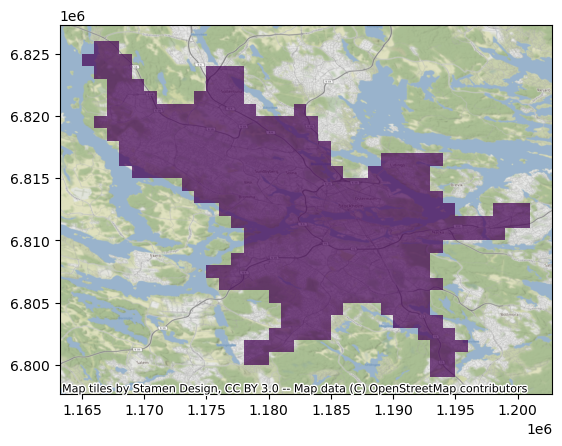

In [17]:
ax = f1.set_geometry('geometry_gdf').plot(column='reach_drive', alpha=0.7)
ctx.add_basemap(ax=ax, crs=f1.set_geometry('geometry_gdf').crs)

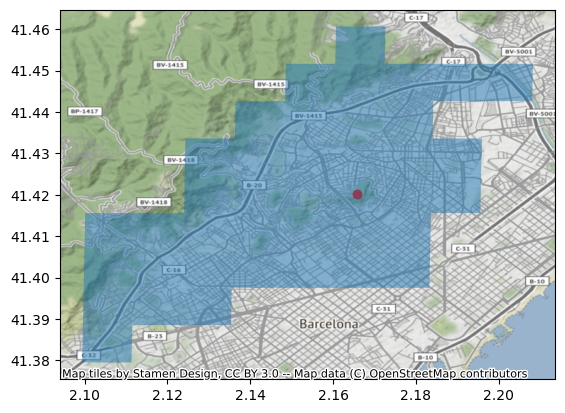

In [81]:
gdf = gdf.to_crs("EPSG:4326")
ax = f1.set_geometry('startpt').iloc[:1].plot(color='red')
gdf[gdf.intersects(f1.iloc[0].geometry)].plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax, crs=gdf.crs)

<Axes: >

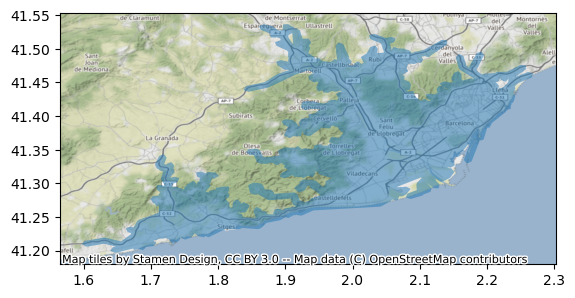

In [18]:
marta_plot = isochrones.sample(1).plot(alpha=0.5)
ctx.add_basemap(ax=marta_plot, crs=isochrones.crs)
marta_plot